# <center> LIFE EXPECTANCY PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import f_regression,SelectKBest

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file
life_expectancy_df = pd.read_csv("./Life_Expectancy_Data.csv")

In [3]:
pd.set_option('display.max_columns',22)
life_expectancy_df


Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0        0.01               71.279624         65.0      1154   19.1   
1        0.01               73.523582         62.0       492   18.6   
2        0.01               73.219243         64.0       430   18.1   
3        0.01               78.184215         67.0      2787   17.6   
4        0.01                7.097109         68.0      3013   17.2   
...       ...                     ...          ...       ...    ...   
2933     4.36                0.000000         68.0        31   27.1   
2934     4.06                0.000000          7.0       998   26.7   
2935     4.43                0.000000         73.0       304   26.3   
2936     1.72                0.000000         76.0       529   25.9   
2937     1.68                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                     83    6.0               8.16         65.0        0.1   
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358879  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0

In [4]:
life_expectancy_df.shape

(2938, 21)

In [5]:
life_expectancy_df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# Renaming columns
life_expectancy_df.rename(columns={ 'Life expectancy ': 'Life_expectancy', 'Adult Mortality':'Adult_Mortality',
       'infant deaths':'infant_deaths','percentage expenditure':'percentage_expenditure', 'under-five deaths ':'under_five_deaths ',
        'Total expenditure':'Total_expenditure',' thinness  1-19 years':'thinness1-19years',' thinness 5-9 years':'thinness5-9years',
       'Income composition of resources':'Incomecompositionofresources','Hepatitis B':'Hepatitis_B'},inplace=True)

In [7]:
life_expectancy_df.columns = life_expectancy_df.columns.str.replace(" ","")

In [8]:
life_expectancy_df

Year      Status  Life_expectancy  Adult_Mortality  infant_deaths  \
0     2015  Developing             65.0            263.0             62   
1     2014  Developing             59.9            271.0             64   
2     2013  Developing             59.9            268.0             66   
3     2012  Developing             59.5            272.0             69   
4     2011  Developing             59.2            275.0             71   
...    ...         ...              ...              ...            ...   
2933  2004  Developing             44.3            723.0             27   
2934  2003  Developing             44.5            715.0             26   
2935  2002  Developing             44.8             73.0             25   
2936  2001  Developing             45.3            686.0             25   
2937  2000  Developing             46.0            665.0             24   

      Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0        0.01               71.279624         65.0     1154  19.1   
1        0.01               73.523582         62.0      492  18.6   
2        0.01               73.219243         64.0      430  18.1   
3        0.01               78.184215         67.0     2787  17.6   
4        0.01                7.097109         68.0     3013  17.2   
...       ...                     ...          ...      ...   ...   
2933     4.36                0.000000         68.0       31  27.1   
2934     4.06                0.000000          7.0      998  26.7   
2935     4.43                0.000000         73.0      304  26.3   
2936     1.72                0.000000         76.0      529  25.9   
2937     1.68                0.000000         79.0     1483  25.5   

      under_five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0                    83    6.0               8.16        65.0       0.1   
1                    86   58.0               8.18        62.0       0.1   
2                    89   62.0               8.13        64.0       0.1   
3                    93   67.0               8.52        67.0       0.1   
4                    97   68.0               7.87        68.0       0.1   
...                 ...    ...                ...         ...       ...   
2933                 42   67.0               7.13        65.0      33.6   
2934                 41    7.0               6.52        68.0      36.7   
2935                 40   73.0               6.53        71.0      39.8   
2936                 39   76.0               6.16        75.0      42.1   
2937                 39   78.0               7.10        78.0      43.5   

             GDP  Population  thinness1-19years  thinness5-9years  \
0     584.259210  33736494.0               17.2              17.3   
1     612.696514    327582.0               17.5              17.5   
2     631.744976  31731688.0               17.7              17.7   
3     669.959000   3696958.0               17.9              18.0   
4      63.537231   2978599.0               18.2              18.2   
...          ...         ...                ...               ...   
2933  454.366654  12777511.0                9.4               9.4   
2934  453.351155  12633897.0                9.8               9.9   
2935   57.348340    125525.0                1.2               1.3   
2936  548.587312  12366165.0                1.6               1.7   
2937  547.358879  12222251.0               11.0              11.2   

      Incomecompositionofresources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
...                            ...        ...  
2933                         0.407        9.2  
2934                         0.418        9.5  
2935                         0.427       10.0  
2936                         0.427        9.8  
2937              

In [9]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          2938 non-null   int64  
 1   Status                        2938 non-null   object 
 2   Life_expectancy               2928 non-null   float64
 3   Adult_Mortality               2928 non-null   float64
 4   infant_deaths                 2938 non-null   int64  
 5   Alcohol                       2744 non-null   float64
 6   percentage_expenditure        2938 non-null   float64
 7   Hepatitis_B                   2385 non-null   float64
 8   Measles                       2938 non-null   int64  
 9   BMI                           2904 non-null   float64
 10  under_five_deaths             2938 non-null   int64  
 11  Polio                         2919 non-null   float64
 12  Total_expenditure             2712 non-null   float64
 13  Dip

In [10]:
life_expectancy_df.isnull().mean()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Life_expectancy                 0.003404
Adult_Mortality                 0.003404
Alcohol                         0.066031
Hepatitis_B                     0.188223
BMI                             0.011572
Polio                           0.006467
Total_expenditure               0.076923
Diphtheria                      0.006467
GDP                             0.152485
Population                      0.221920
thinness1-19years               0.011572
thinness5-9years                0.011572
Incomecompositionofresources    0.056841
Schooling                       0.055480
dtype: float64

In [11]:
# Perfoming one hot encoding on status column
life_expectancy_df['Status'] = pd.get_dummies(data=life_expectancy_df.Status,drop_first=True)
life_expectancy_df

Year  Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015       1             65.0            263.0             62     0.01   
1     2014       1             59.9            271.0             64     0.01   
2     2013       1             59.9            268.0             66     0.01   
3     2012       1             59.5            272.0             69     0.01   
4     2011       1             59.2            275.0             71     0.01   
...    ...     ...              ...              ...            ...      ...   
2933  2004       1             44.3            723.0             27     4.36   
2934  2003       1             44.5            715.0             26     4.06   
2935  2002       1             44.8             73.0             25     4.43   
2936  2001       1             45.3            686.0             25     1.72   
2937  2000       1             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under_five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0       6.0               8.16        65.0       0.1  584.259210  33736494.0   
1      58.0               8.18        62.0       0.1  612.696514    327582.0   
2      62.0               8.13        64.0       0.1  631.744976  31731688.0   
3      67.0               8.52        67.0       0.1  669.959000   3696958.0   
4      68.0               7.87        68.0       0.1   63.537231   2978599.0   
...     ...                ...         ...       ...         ...         ...   
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358879  12222251.0   

      thinness1-19years  thinness5-9years  Incomecompositionofresources  \
0                  17.2              17.3                         0.479   
1                  17.5              17.5                         0.476   
2                  17.7              17.7                         0.470   
3                  17.9              18.0                         0.463   
4                  18.2              18.2                         0.454   
...                 ...               ...                           ...   
2933                9.4               9.4                         0.407   
2934                9.8               9.9                         0.418   
2935                1.2               1.3                         0.427   
2936                1.6               1.7                         0.427   
2937               11.0              11.2                         0.434   

      Schooling  
0          10.1  
1          10.0  
2           9.9  
3           9.8  
4           9.5  
...         ...  
2933        9.2  
2934        9.5  
2935       10.0  
2936        9.8  
2937        9.8  

[2938 rows x 21 c

In [12]:
# most of the values are continuous,filling nan values with mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [13]:
life_expectancy_df.isnull().sum()

Year                            0
Status                          0
Life_expectancy                 0
Adult_Mortality                 0
infant_deaths                   0
Alcohol                         0
percentage_expenditure          0
Hepatitis_B                     0
Measles                         0
BMI                             0
under_five_deaths               0
Polio                           0
Total_expenditure               0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [14]:
life_expectancy_df.describe().T

count          mean           std         min  \
Year                          2938.0  2.007519e+03  4.613841e+00  2000.00000   
Status                        2938.0  8.257318e-01  3.794045e-01     0.00000   
Life_expectancy               2938.0  6.922493e+01  9.507640e+00    36.30000   
Adult_Mortality               2938.0  1.647964e+02  1.240803e+02     1.00000   
infant_deaths                 2938.0  3.030395e+01  1.179265e+02     0.00000   
Alcohol                       2938.0  4.602861e+00  3.916288e+00     0.01000   
percentage_expenditure        2938.0  7.382513e+02  1.987915e+03     0.00000   
Hepatitis_B                   2938.0  8.094046e+01  2.258685e+01     1.00000   
Measles                       2938.0  2.419592e+03  1.146727e+04     0.00000   
BMI                           2938.0  3.832125e+01  1.992768e+01     1.00000   
under_five_deaths             2938.0  4.203574e+01  1.604455e+02     0.00000   
Polio                         2938.0  8.255019e+01  2.335214e+01     3.00000   
Total_expenditure             2938.0  5.938190e+00  2.400274e+00     0.37000   
Diphtheria                    2938.0  8.232408e+01  2.364007e+01     2.00000   
HIV/AIDS                      2938.0  1.742103e+00  5.077785e+00     0.10000   
GDP                           2938.0  7.483158e+03  1.313680e+04     1.68135   
Population                    2938.0  1.275338e+07  5.381546e+07    34.00000   
thinness1-19years             2938.0  4.839704e+00  4.394535e+00     0.10000   
thinness5-9years              2938.0  4.870317e+00  4.482708e+00     0.10000   
Incomecompositionofresources  2938.0  6.275511e-01  2.048197e-01     0.00000   
Schooling                     2938.0  1.199279e+01  3.264381e+00     0.00000   

                                        25%           50%           75%  \
Year                            2004.000000  2.008000e+03  2.012000e+03   
Status                             1.000000  1.000000e+00  1.000000e+00   
Life_expectancy                   63.200000  7.200000e+01  7.560000e+01   
Adult_Mortality                   74.000000  1.440000e+02  2.270000e+02   
infant_deaths                      0.000000  3.000000e+00  2.200000e+01   
Alcohol                            1.092500  4.160000e+00  7.390000e+00   
percentage_expenditure             4.685343  6.491291e+01  4.415341e+02   
Hepatitis_B                       80.940461  8.700000e+01  9.600000e+01   
Measles                            0.000000  1.700000e+01  3.602500e+02   
BMI                               19.400000  4.300000e+01  5.610000e+01   
under_five_deaths                  0.000000  4.000000e+00  2.800000e+01   
Polio                             78.000000  9.300000e+01  9.700000e+01   
Total_expenditure                  4.370000  5.938190e+00  7.330000e+00   
Diphtheria                        78.000000  9.300000e+01  9.700000e+01   
HIV/AIDS                           0.100000  1.000000e-01  8.000000e-01   
GDP                              580.486996  3.116562e+03  7.483158e+03   
Population                    418917.250000  3.675929e+06  1.275338e+07   
thinness1-19years                  1.600000  3.400000e+00  7.100000e+00   
thinness5-9years                   1.600000  3.400000e+00  7.200000e+00   
Incomecompositionofresources       0.504250  6.620000e-01  7.720000e-01   
Schooling                         10.300000  1.210000e+01  1.410000e+01   

                                       max  
Year                          2.015000e+03  
Status                        1.000000e+00  
Life_expectancy               8.900000e+01  
Adult_Mortality               7.230000e+02  
infant_deaths                 1.800000e+03  
Alcohol                       1.787000e+01  
percentage_expenditure        1.947991e+04  
Hepatitis_B                   9.900000e+01  
Measles                       2.121830e+05  
BMI                           8.730000e+01  
under_five_deaths             2.500000e+03  
Polio                         9.900000e+01  
Total_expenditure             1.76

### Exploratory data analysis and visualisation

In [15]:
life_expectancy_df

Year  Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015       1             65.0            263.0             62     0.01   
1     2014       1             59.9            271.0             64     0.01   
2     2013       1             59.9            268.0             66     0.01   
3     2012       1             59.5            272.0             69     0.01   
4     2011       1             59.2            275.0             71     0.01   
...    ...     ...              ...              ...            ...      ...   
2933  2004       1             44.3            723.0             27     4.36   
2934  2003       1             44.5            715.0             26     4.06   
2935  2002       1             44.8             73.0             25     4.43   
2936  2001       1             45.3            686.0             25     1.72   
2937  2000       1             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under_five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0       6.0               8.16        65.0       0.1  584.259210  33736494.0   
1      58.0               8.18        62.0       0.1  612.696514    327582.0   
2      62.0               8.13        64.0       0.1  631.744976  31731688.0   
3      67.0               8.52        67.0       0.1  669.959000   3696958.0   
4      68.0               7.87        68.0       0.1   63.537231   2978599.0   
...     ...                ...         ...       ...         ...         ...   
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358879  12222251.0   

      thinness1-19years  thinness5-9years  Incomecompositionofresources  \
0                  17.2              17.3                         0.479   
1                  17.5              17.5                         0.476   
2                  17.7              17.7                         0.470   
3                  17.9              18.0                         0.463   
4                  18.2              18.2                         0.454   
...                 ...               ...                           ...   
2933                9.4               9.4                         0.407   
2934                9.8               9.9                         0.418   
2935                1.2               1.3                         0.427   
2936                1.6               1.7                         0.427   
2937               11.0              11.2                         0.434   

      Schooling  
0          10.1  
1          10.0  
2           9.9  
3           9.8  
4           9.5  
...         ...  
2933        9.2  
2934        9.5  
2935       10.0  
2936        9.8  
2937        9.8  

[2938 rows x 21 c

In [16]:
life_expectancy_df.columns

Index(['Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [17]:
num_cols = ['Life_expectancy','Adult_Mortality','infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles','BMI',
           'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria','HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling']

In [18]:
palette = itertools.cycle(sns.color_palette())

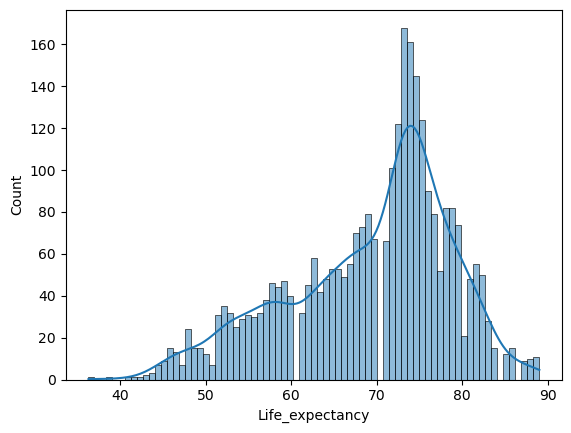

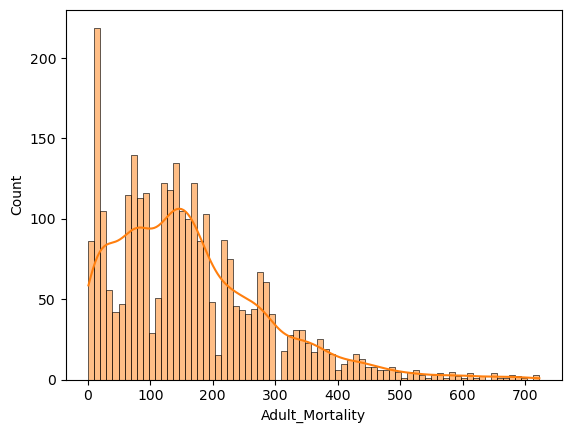

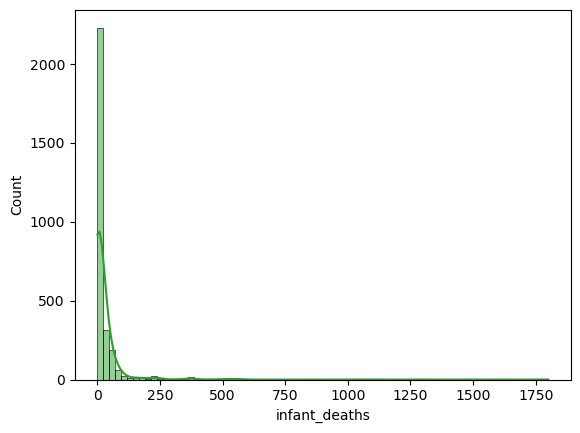

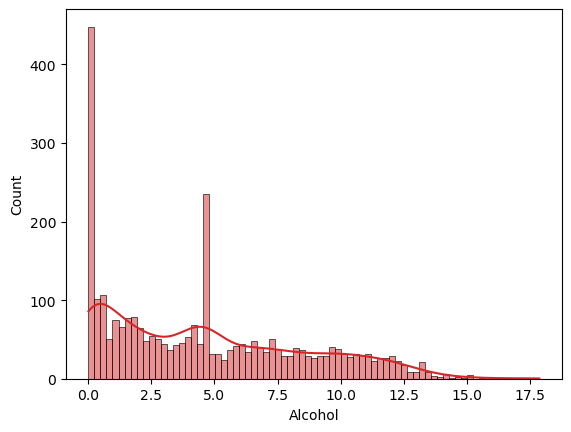

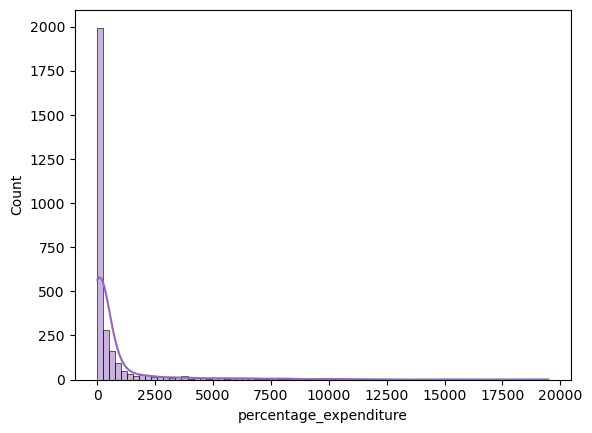

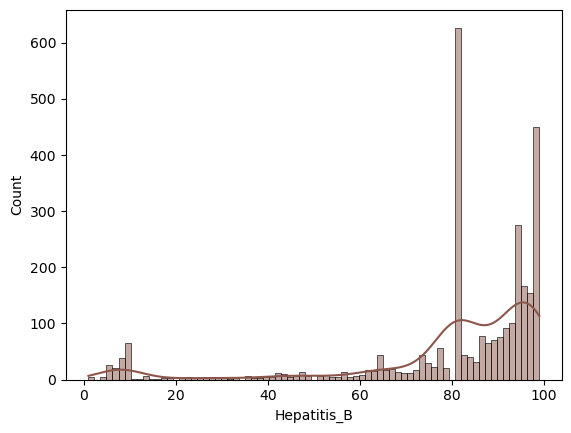

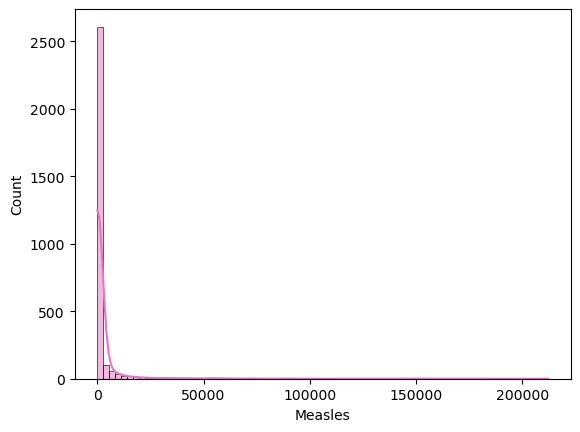

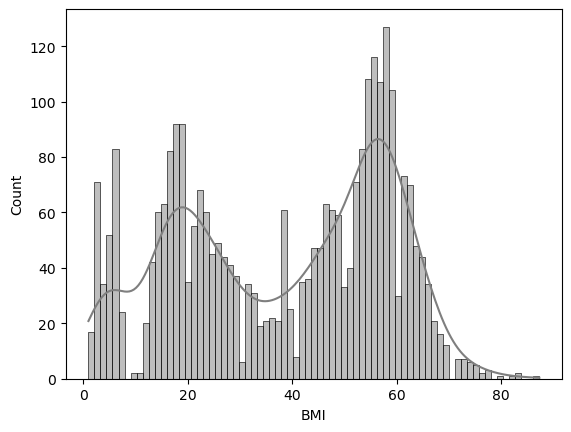

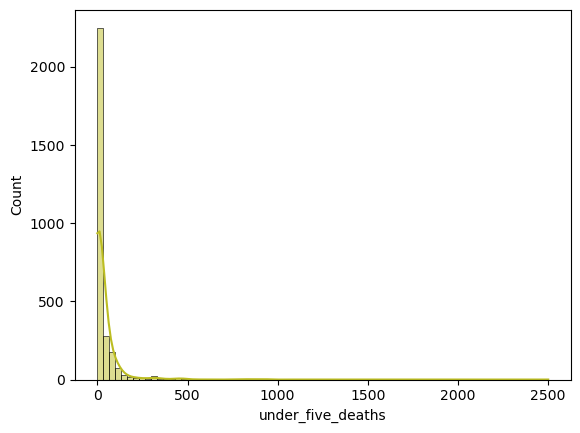

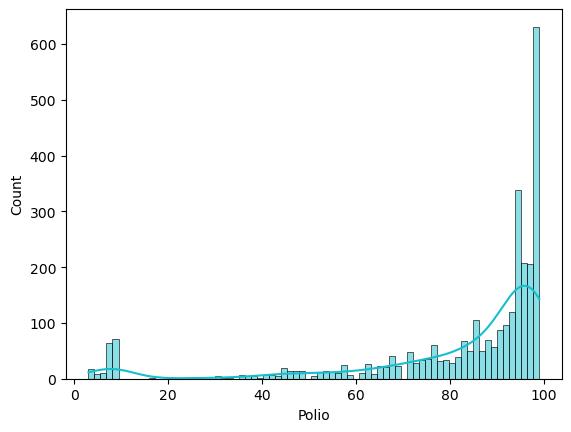

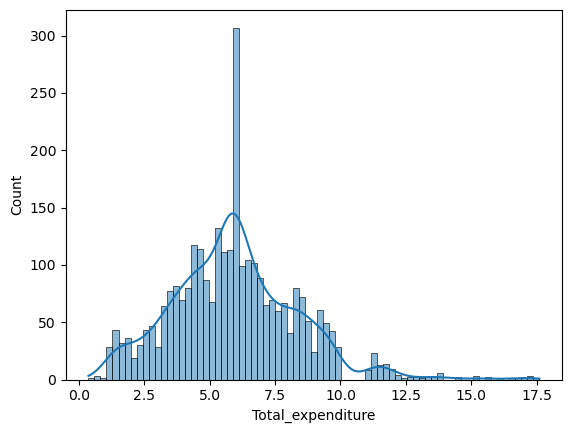

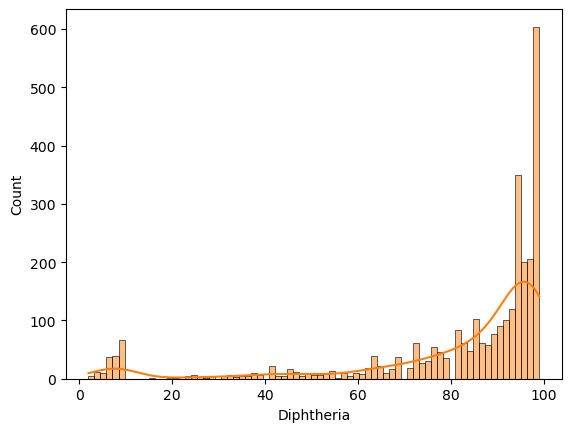

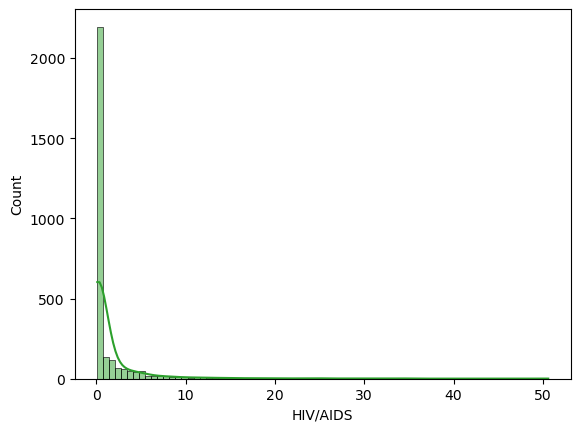

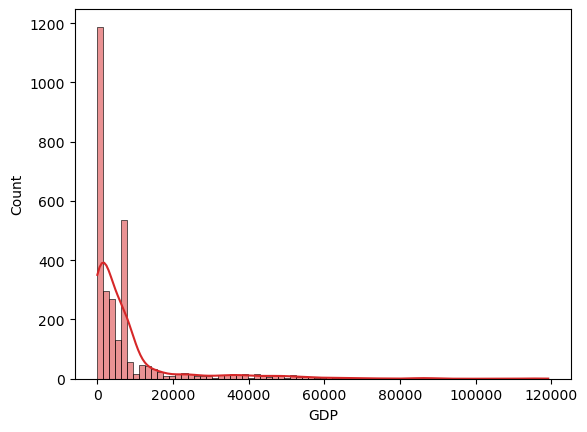

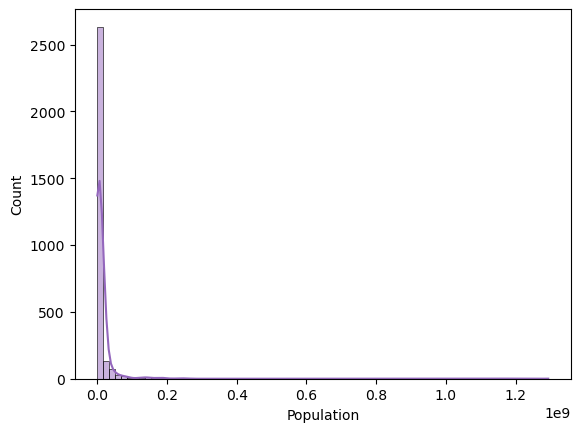

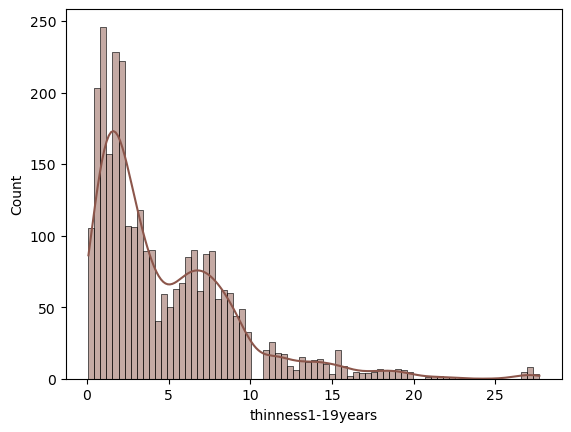

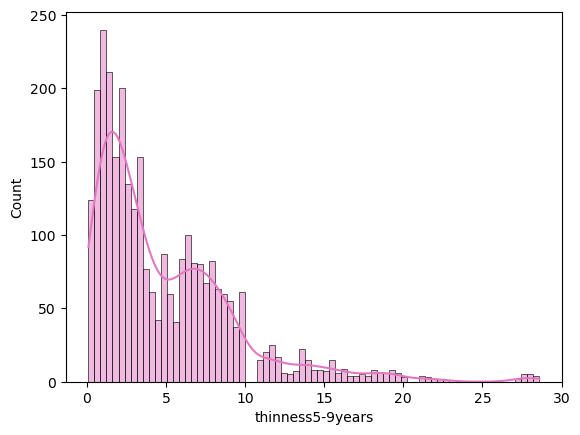

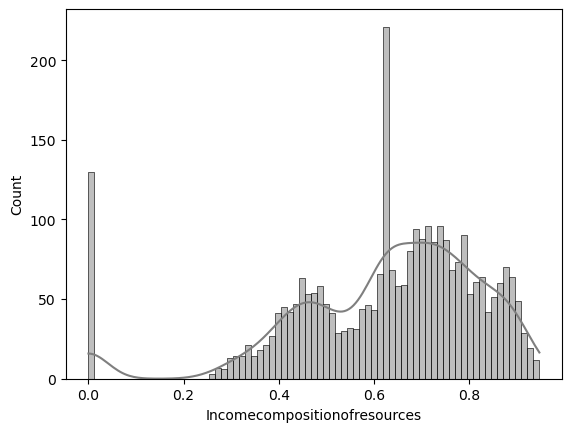

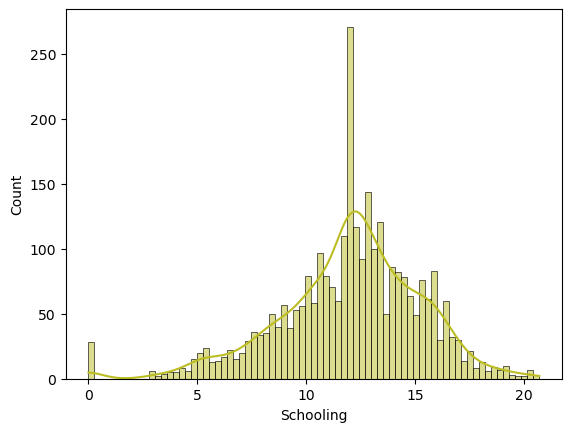

In [19]:
# Histogram
for i in num_cols:
    sns.histplot(x=life_expectancy_df[i],kde=True,color=next(palette),bins=75)
    plt.show()

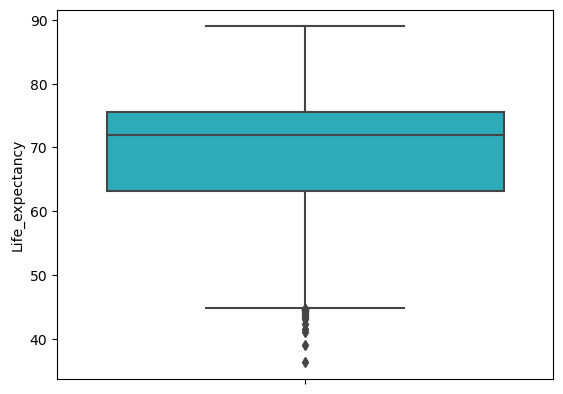

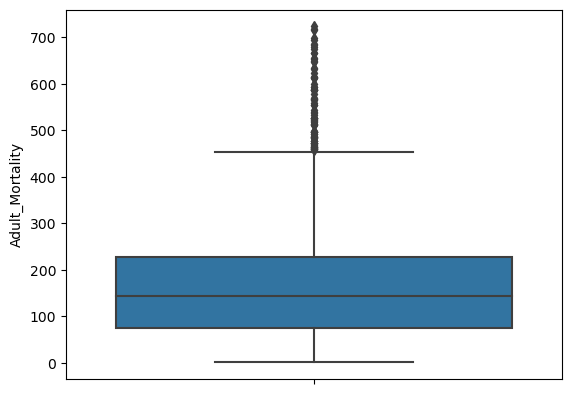

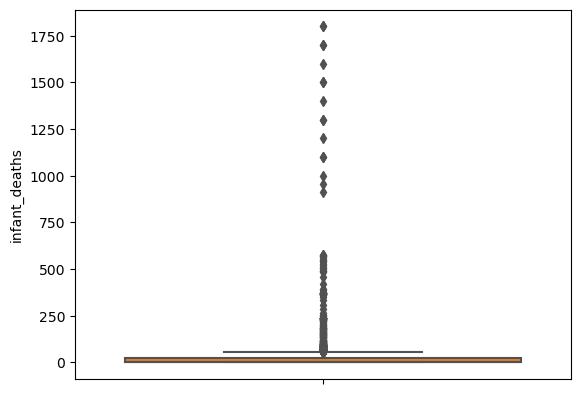

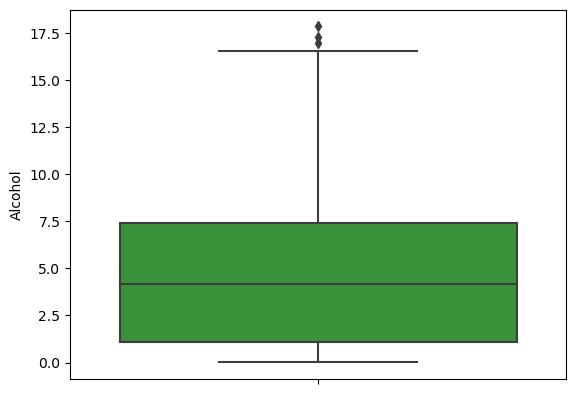

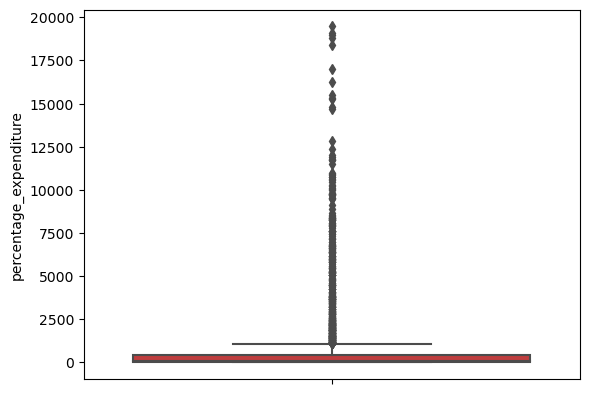

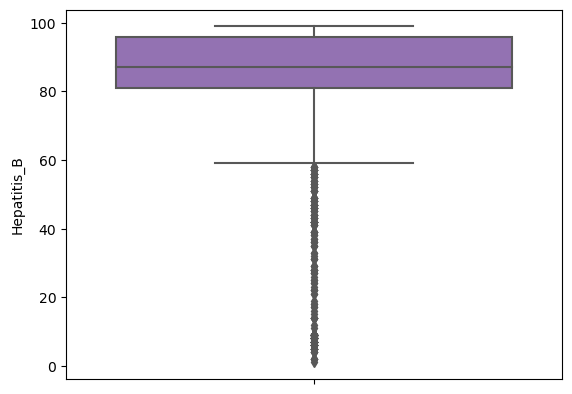

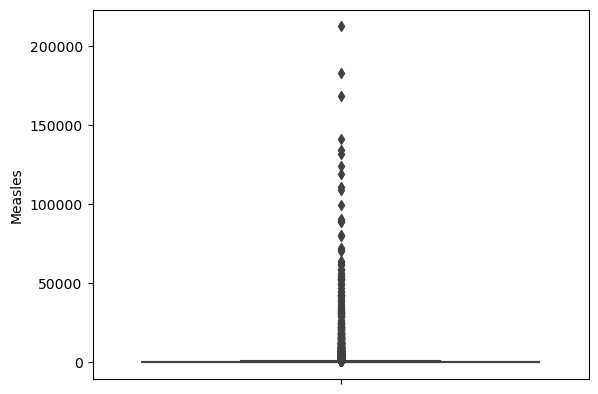

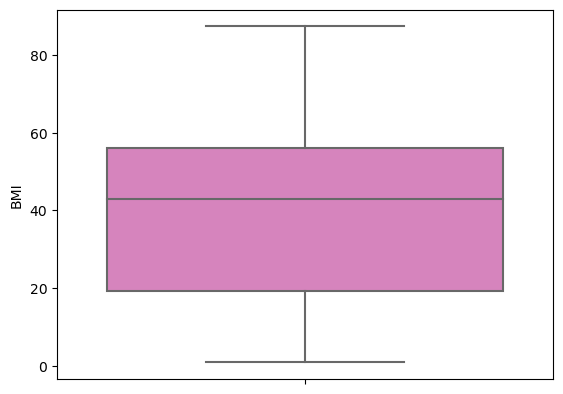

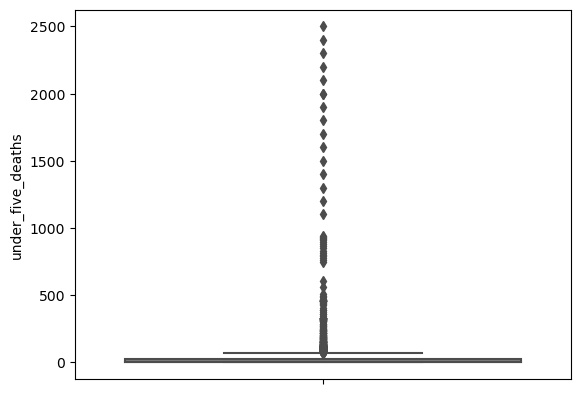

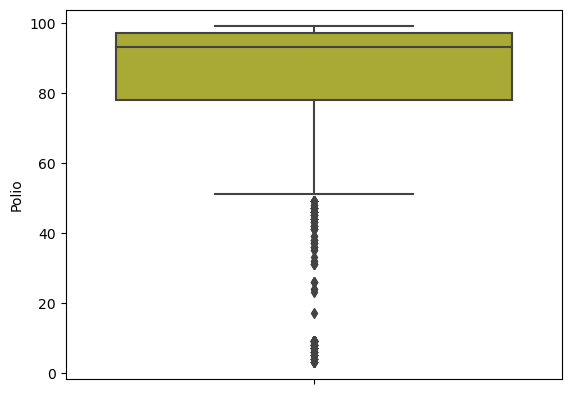

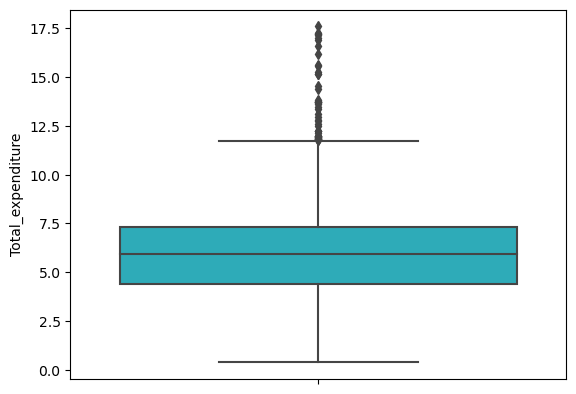

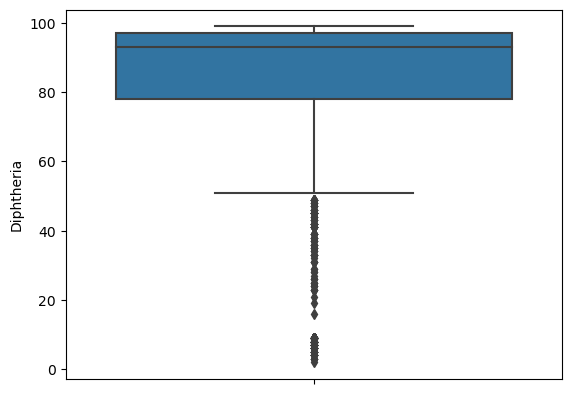

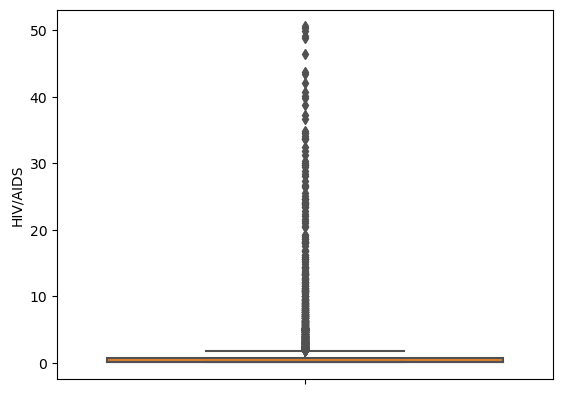

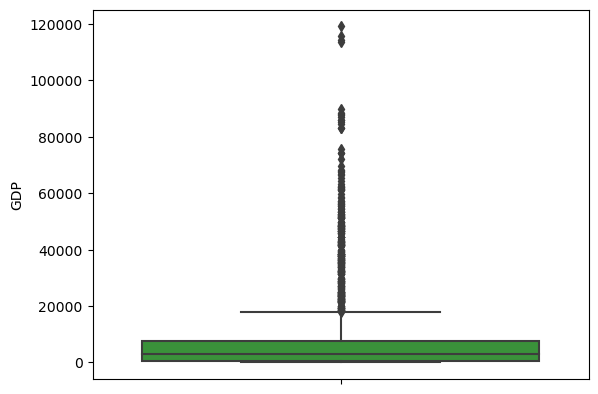

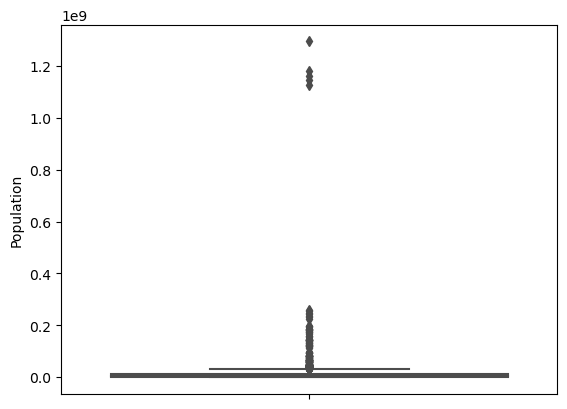

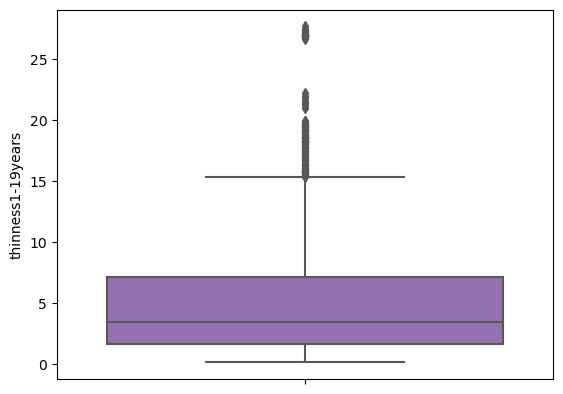

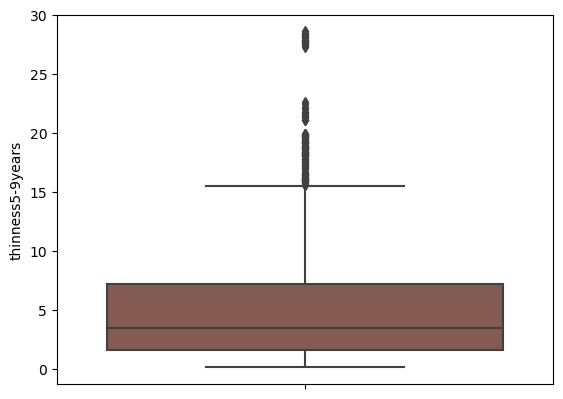

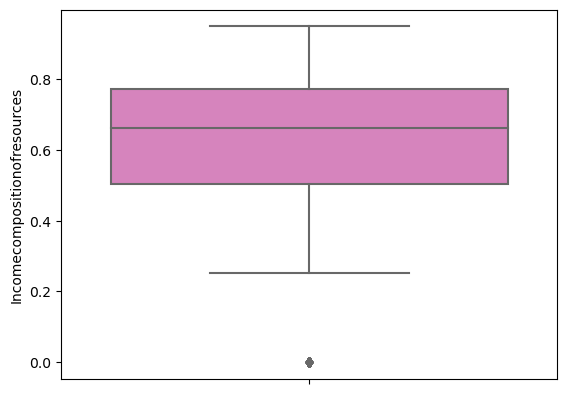

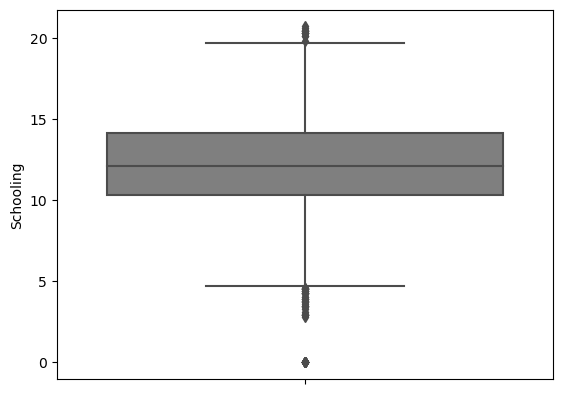

In [20]:
# Boxplot
for i in num_cols:
    sns.boxplot(y=life_expectancy_df[i],color=next(palette))
    plt.show()

In [25]:
# Outlier treatment
def outerlimit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [26]:
UL,LL = outerlimit(life_expectancy_df.Life_expectancy)
life_expectancy_df['Life_expectancy'] = np.where((life_expectancy_df.Life_expectancy>UL) | (life_expectancy_df.Life_expectancy<LL),\
                                                 np.nan,life_expectancy_df.Life_expectancy)

In [27]:
life_expectancy_df.dropna(inplace=True)

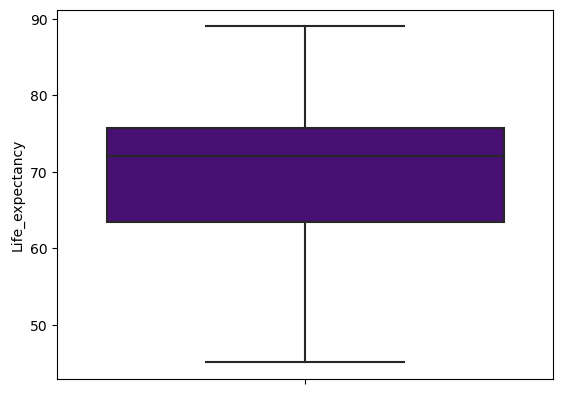

In [28]:
sns.boxplot(data=life_expectancy_df,y='Life_expectancy',color='indigo')
plt.show()

In [29]:
predictor_variables = ['Adult_Mortality','infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles','BMI',
           'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria','HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling']

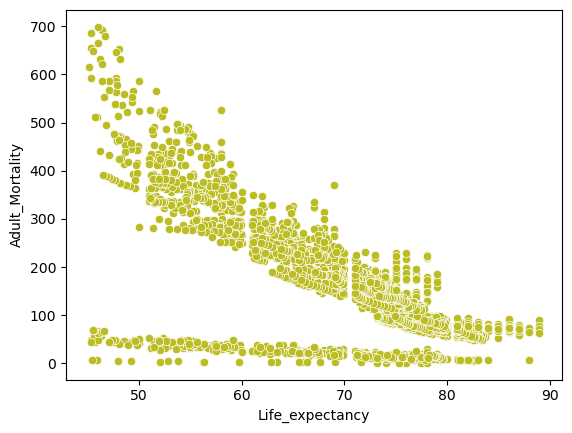

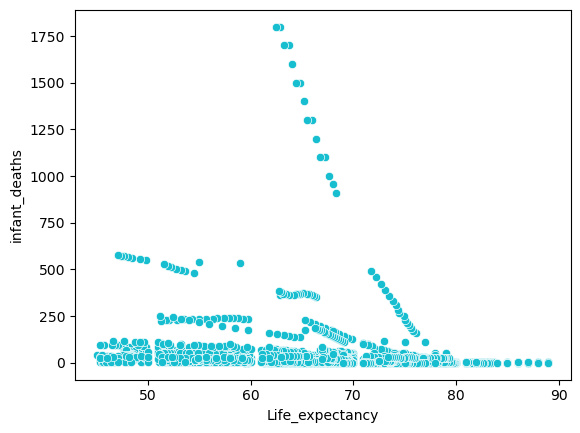

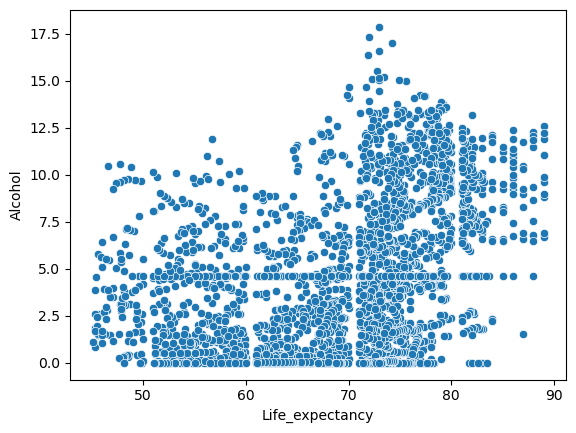

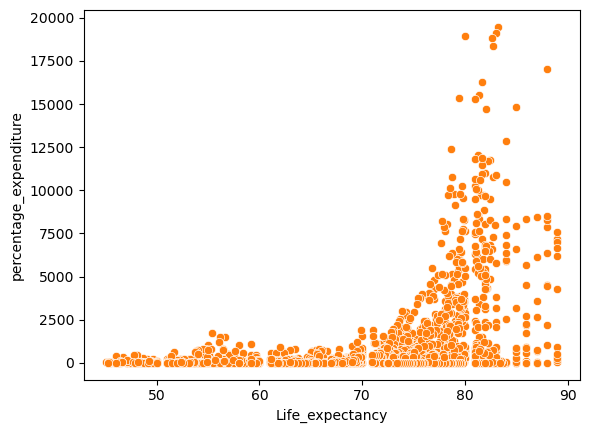

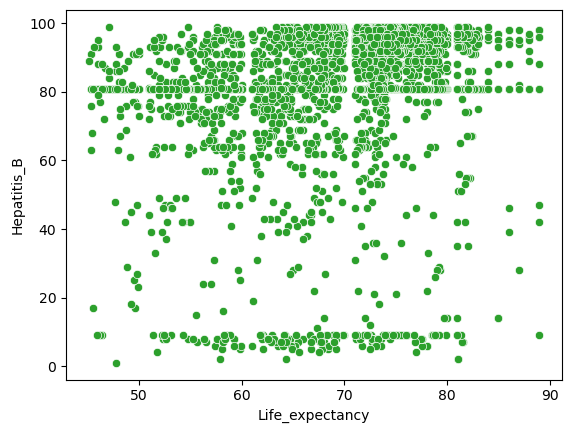

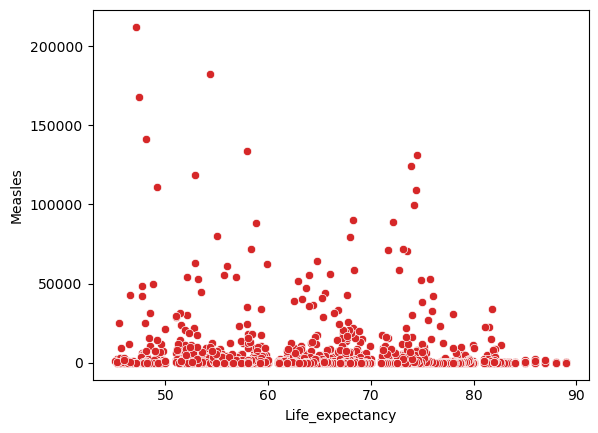

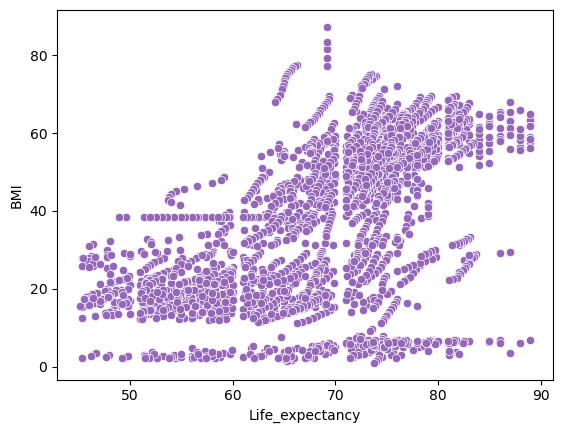

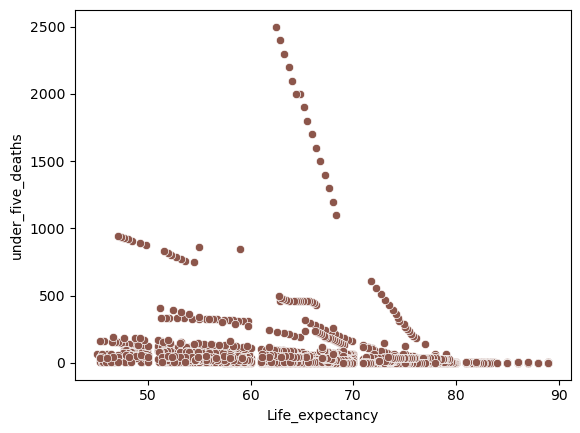

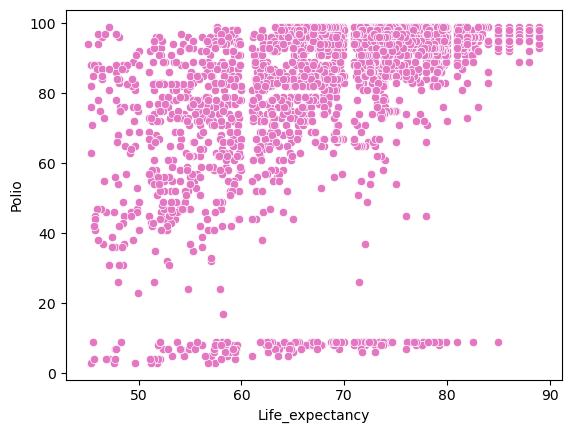

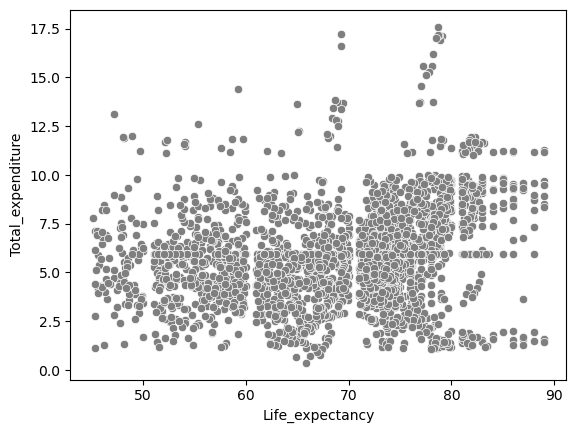

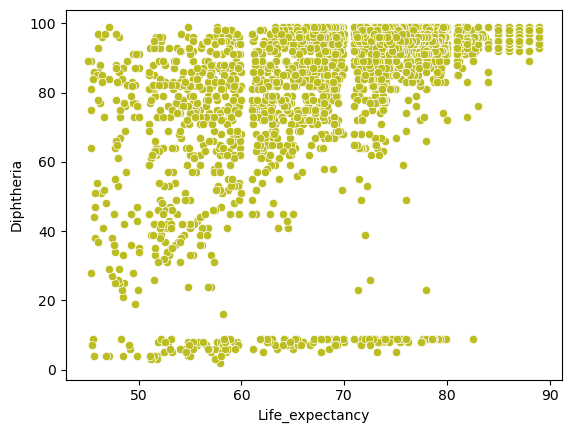

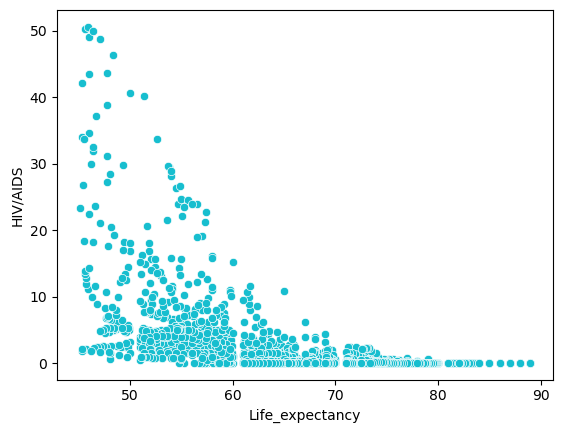

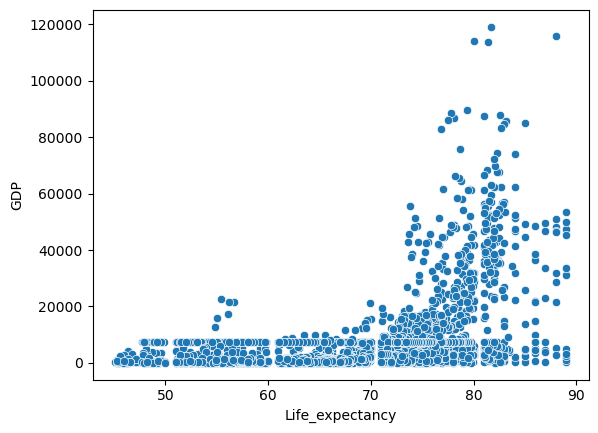

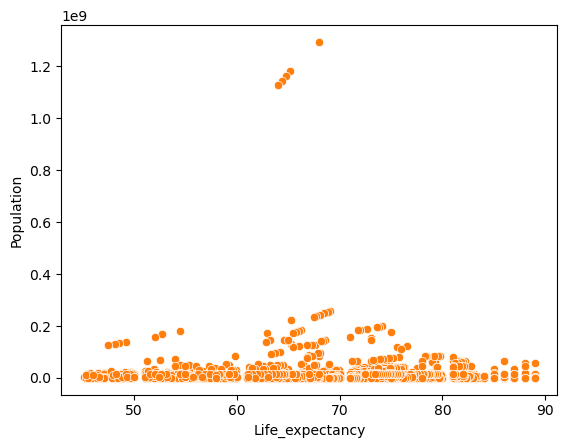

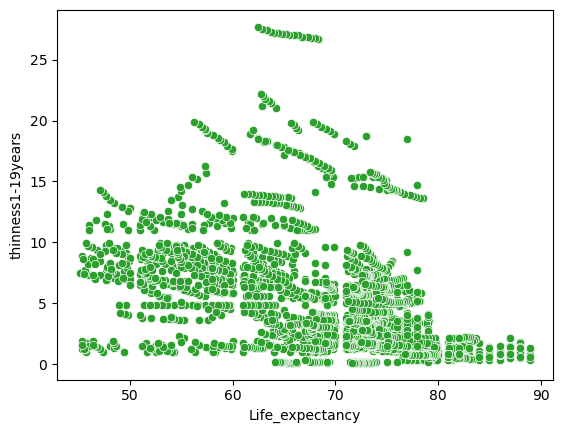

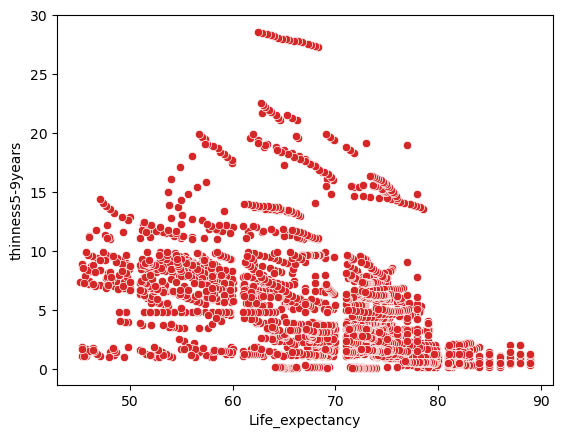

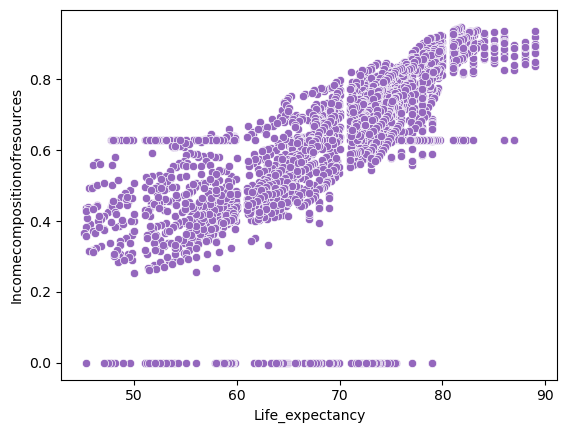

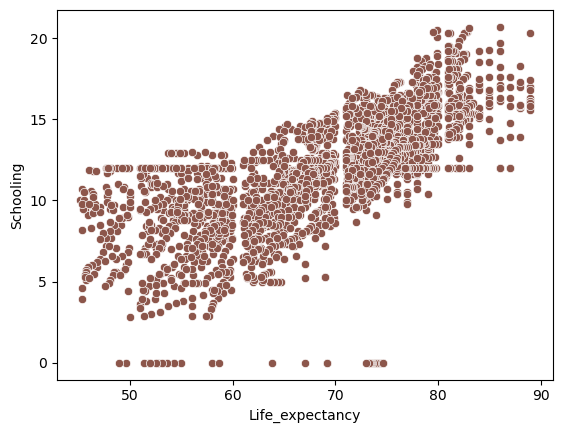

In [30]:
# scatterplot
for i in predictor_variables:
    sns.scatterplot(data=life_expectancy_df,x='Life_expectancy',y=life_expectancy_df[i],color=next(palette))
    plt.show()

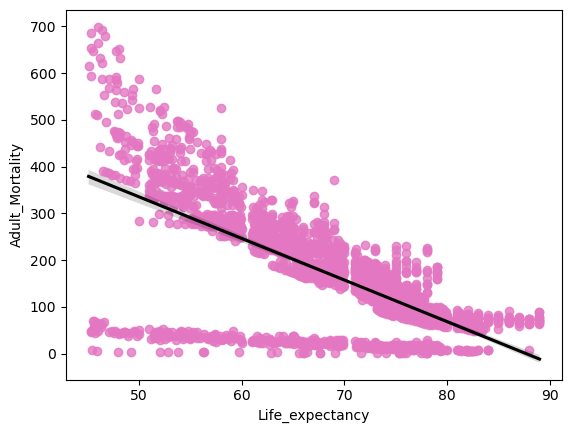

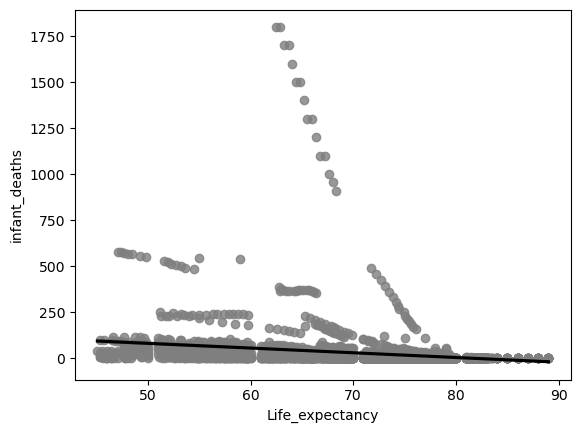

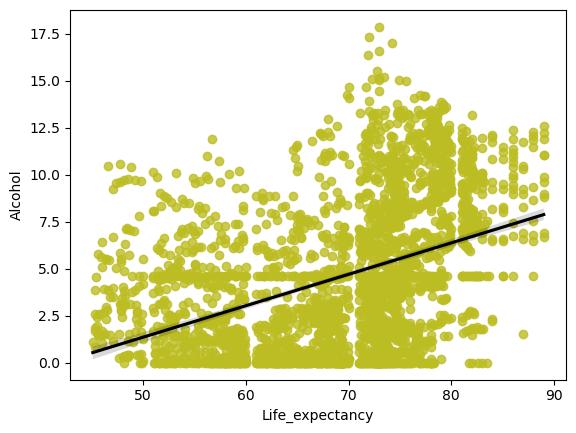

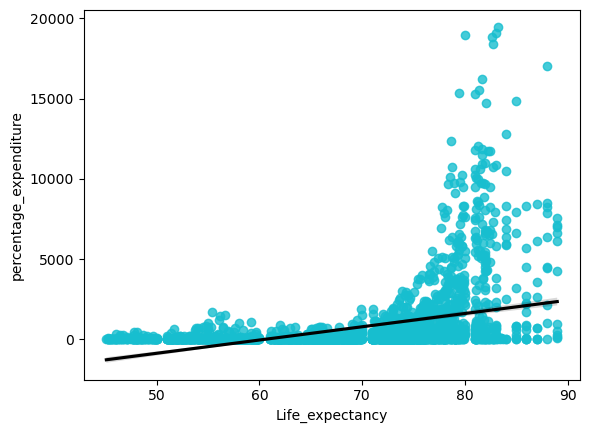

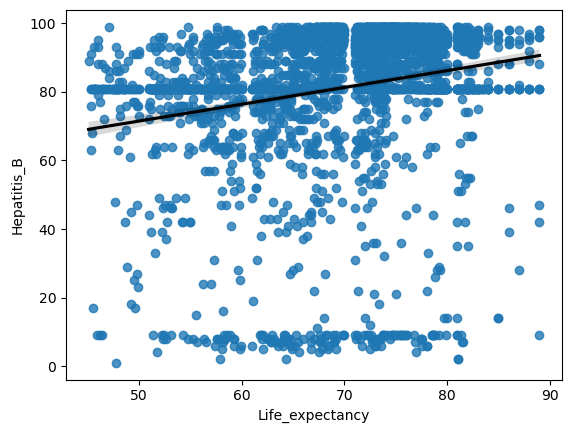

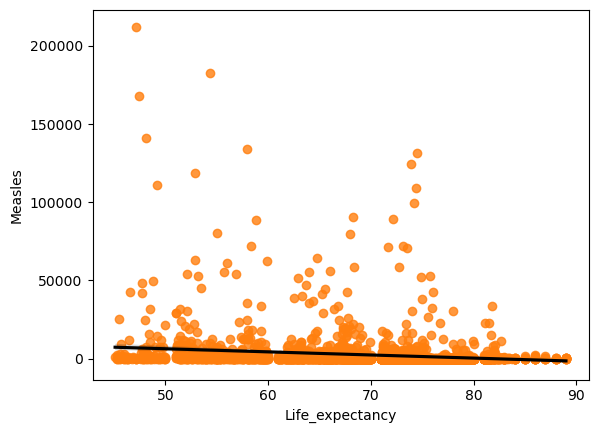

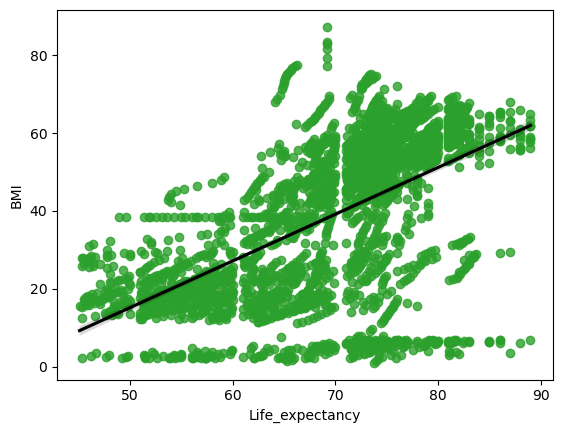

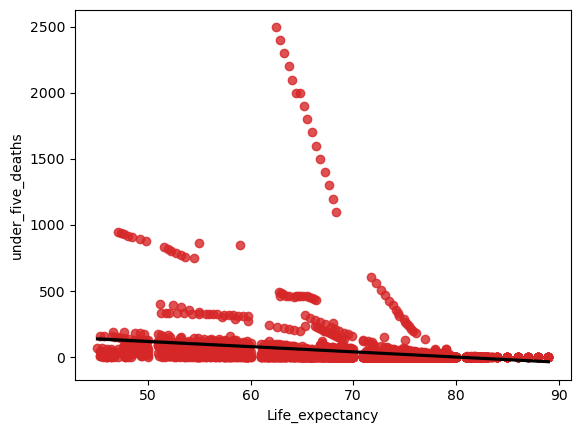

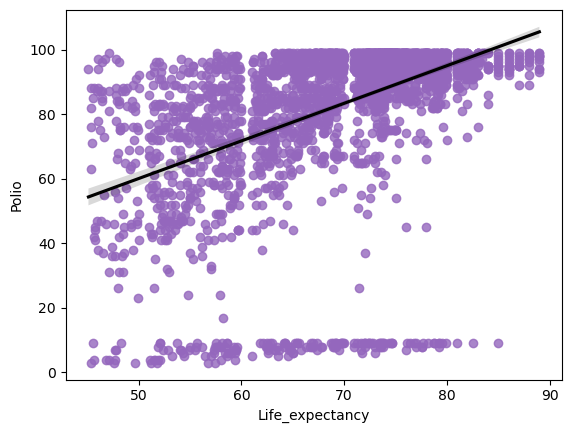

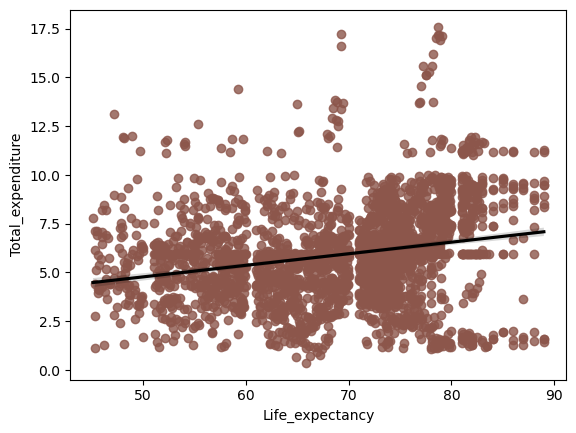

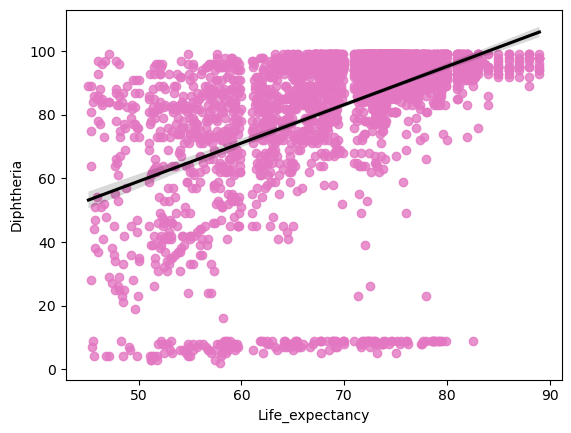

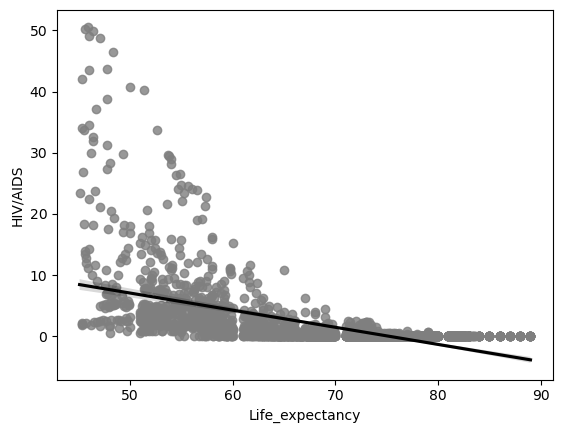

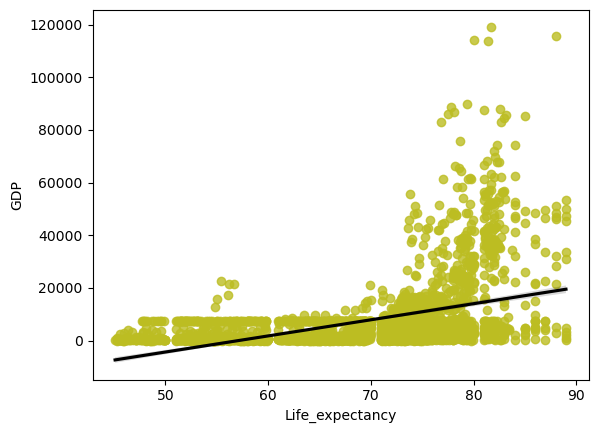

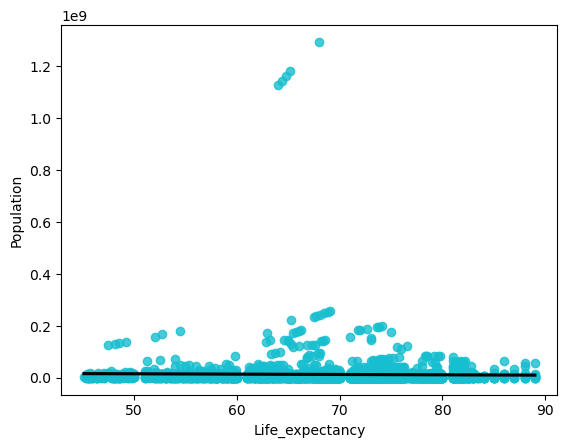

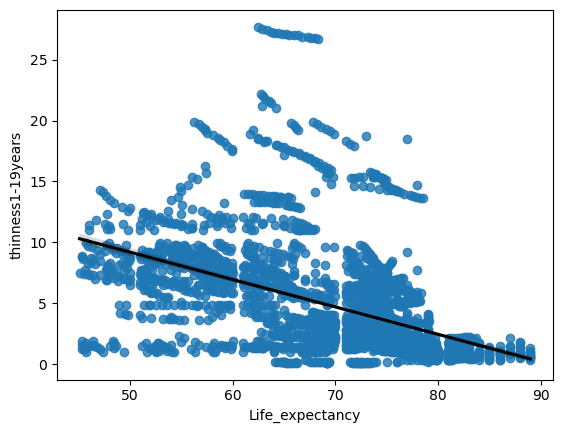

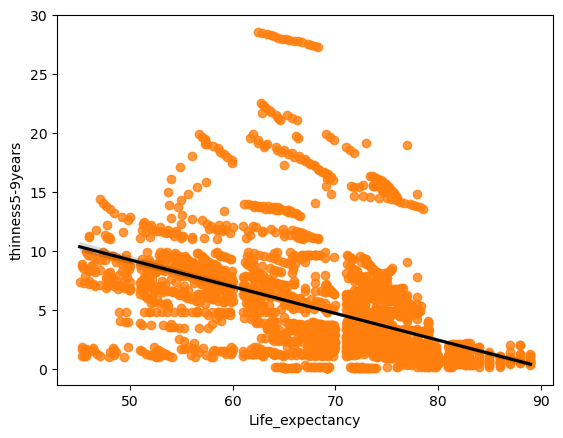

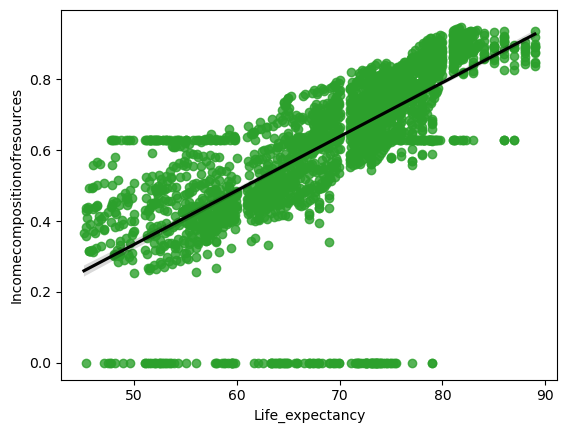

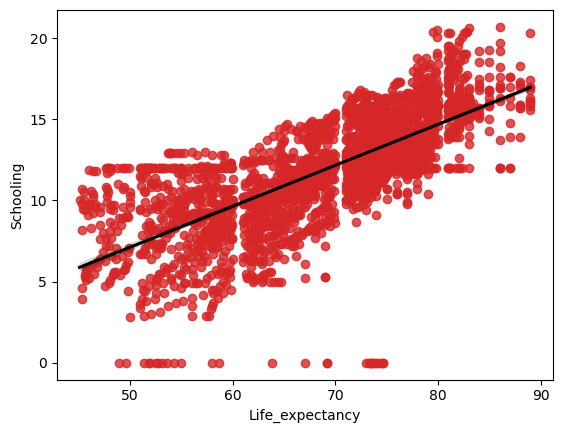

In [31]:
# Regplot
for i in predictor_variables:
    sns.regplot(data=life_expectancy_df,x='Life_expectancy',y=life_expectancy_df[i],color=next(palette),line_kws={"color": "black"})
    plt.show()

In [32]:
# Pairplot
#plt.figure(figsize=(20,20))
#sns.pairplot(data=life_expectancy_df);

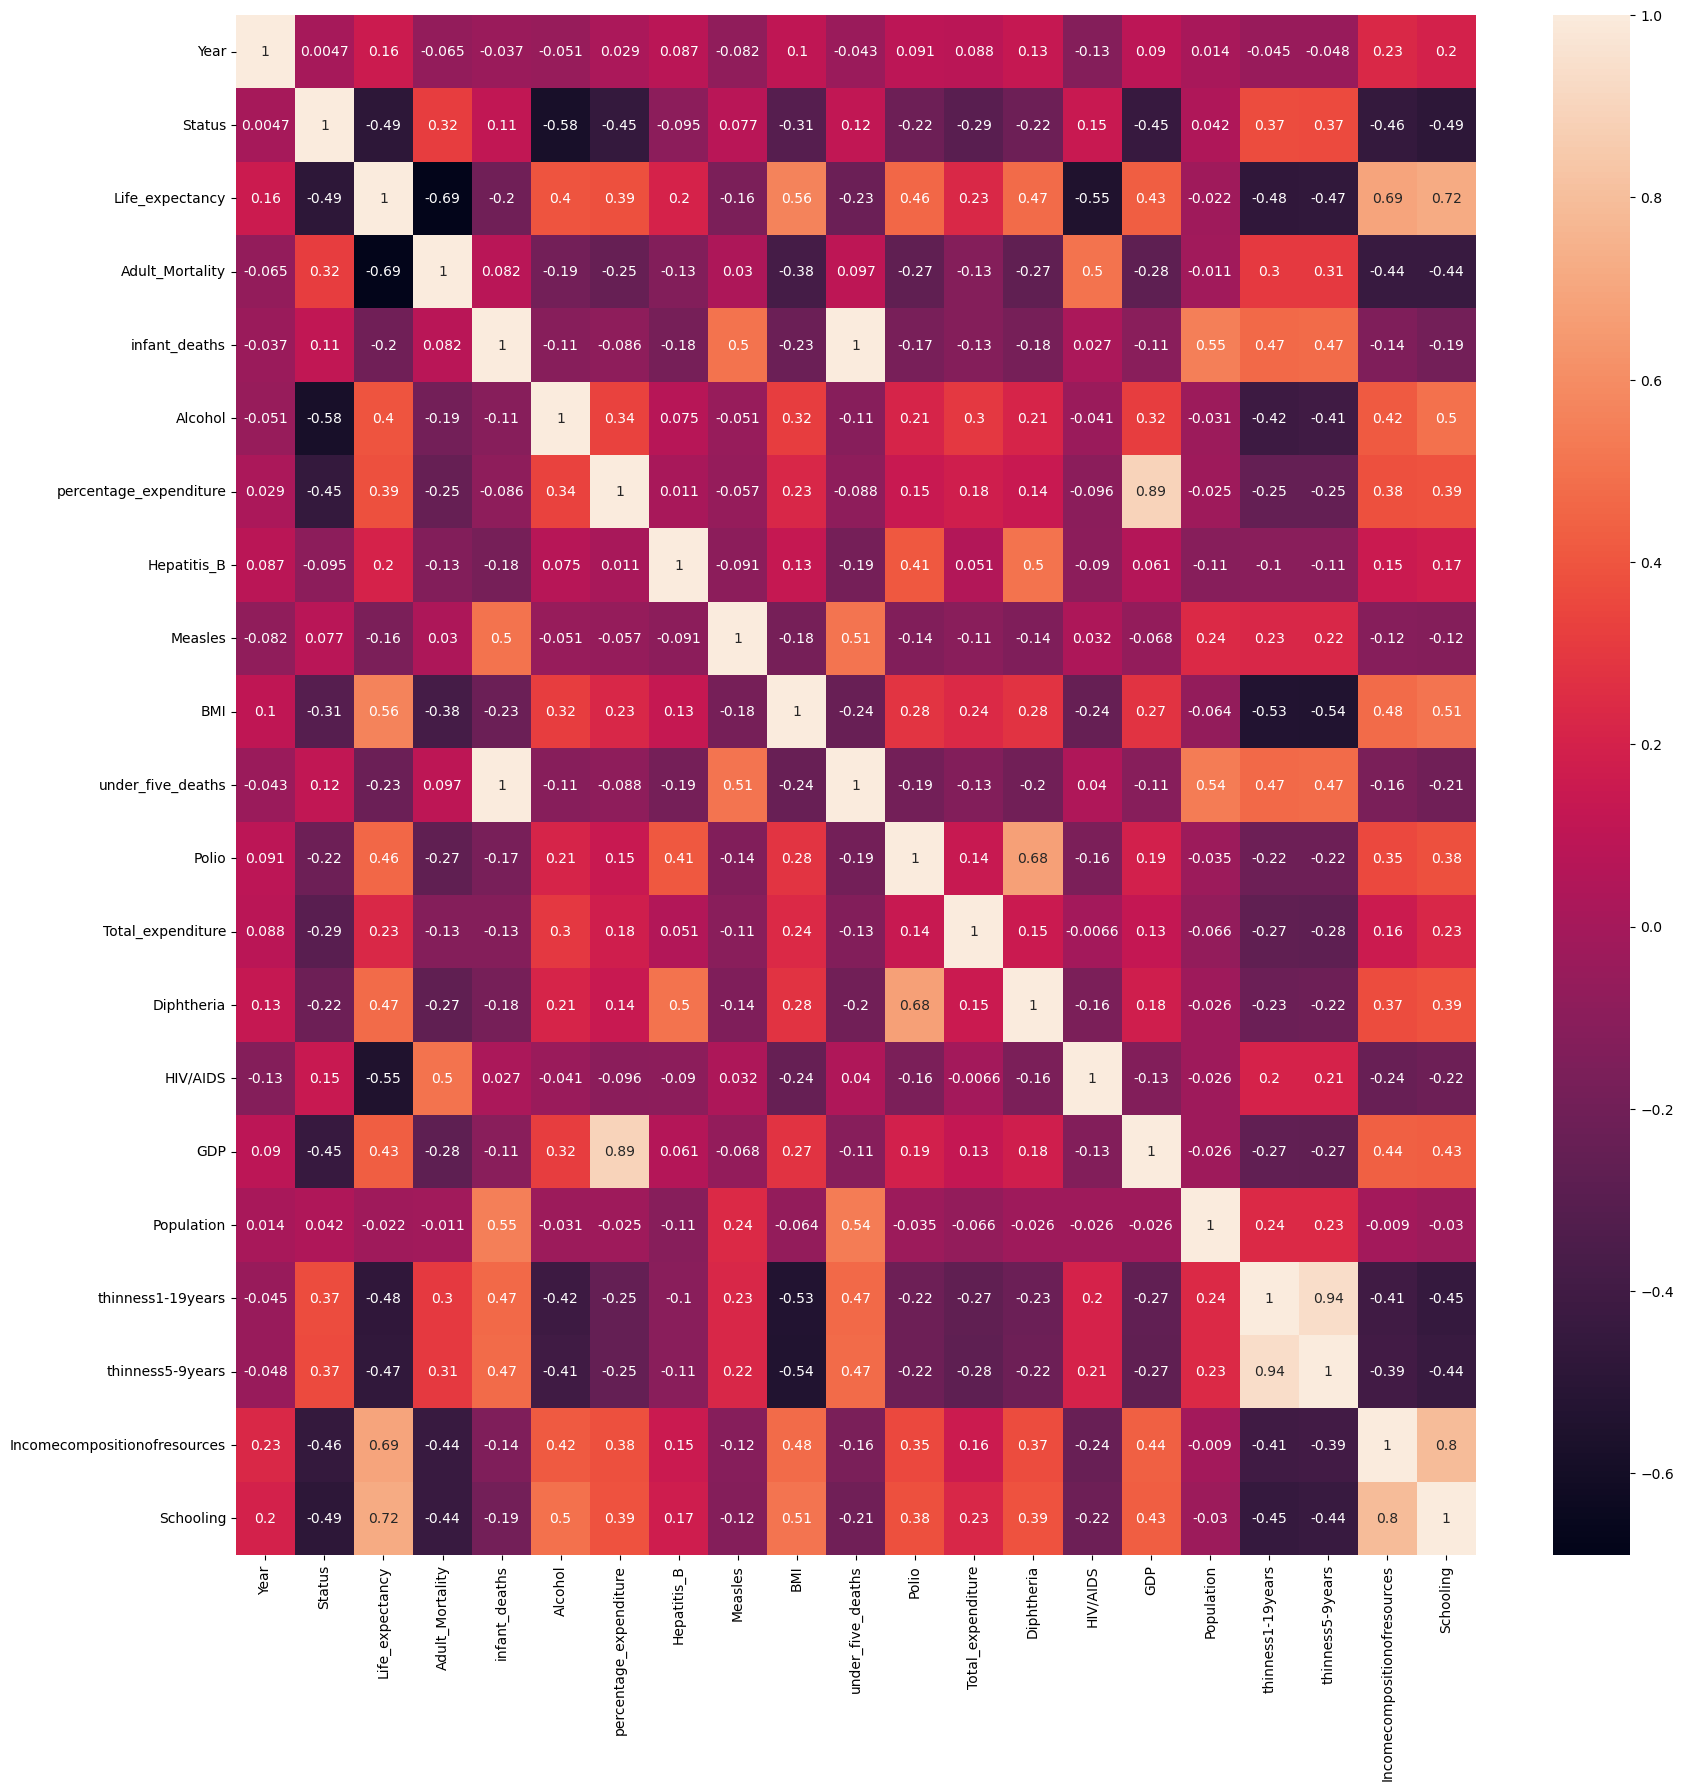

In [33]:
# Correlation matrix
plt.figure(figsize=(20,20))
corr_matrix = life_expectancy_df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

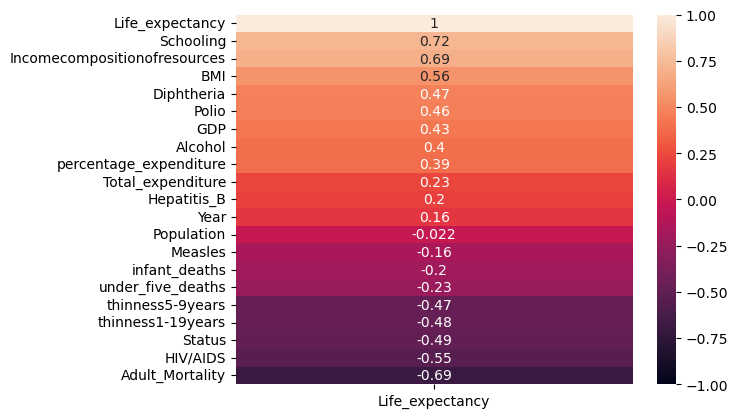

In [34]:
sns.heatmap(life_expectancy_df.corr()[['Life_expectancy']].sort_values(by='Life_expectancy',ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

### Creating Testing and Training dataset

In [35]:
life_expectancy_df.columns

Index(['Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [36]:
x = life_expectancy_df[['Incomecompositionofresources', 'Schooling','BMI','percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
        'Polio', 'Total_expenditure', 'Diphtheria','GDP']].values

In [37]:
y = life_expectancy_df[['Life_expectancy']].values

In [38]:
x

array([[4.79000000e-01, 1.01000000e+01, 1.91000000e+01, ...,
        8.16000000e+00, 6.50000000e+01, 5.84259210e+02],
       [4.76000000e-01, 1.00000000e+01, 1.86000000e+01, ...,
        8.18000000e+00, 6.20000000e+01, 6.12696514e+02],
       [4.70000000e-01, 9.90000000e+00, 1.81000000e+01, ...,
        8.13000000e+00, 6.40000000e+01, 6.31744976e+02],
       ...,
       [4.08000000e-01, 9.50000000e+00, 2.79000000e+01, ...,
        5.12000000e+00, 7.00000000e+00, 4.14796232e+02],
       [4.27000000e-01, 9.80000000e+00, 2.59000000e+01, ...,
        6.16000000e+00, 7.50000000e+01, 5.48587312e+02],
       [4.34000000e-01, 9.80000000e+00, 2.55000000e+01, ...,
        7.10000000e+00, 7.80000000e+01, 5.47358879e+02]])

### Feature selection with all features

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=None)

In [40]:
fs = SelectKBest(score_func=f_regression,k='all')

In [41]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000002532052B0A0>)

In [42]:
for i in range(len(fs.scores_)):
     print(f"Feature is :{i} and score is {fs.scores_[i]}")

Feature is :0 and score is 2245.299466116364
Feature is :1 and score is 2671.2345155921957
Feature is :2 and score is 1061.1039502415363
Feature is :3 and score is 385.0120451605796
Feature is :4 and score is 101.24387055752575
Feature is :5 and score is 59.86232306112487
Feature is :6 and score is 1061.1039502415363
Feature is :7 and score is 667.6772349217897
Feature is :8 and score is 141.03261546914
Feature is :9 and score is 695.3970151743505
Feature is :10 and score is 509.8354076916836


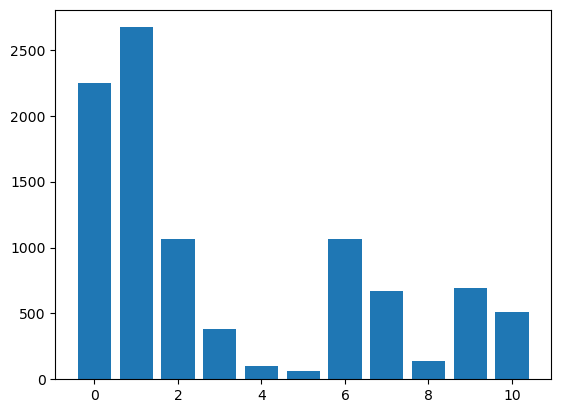

In [43]:
# Scores plotting in bar graph
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

In [44]:
# Selecting k=8
fs = SelectKBest(score_func=f_regression,k=8)

In [45]:
fs.fit(x_train,y_train)

SelectKBest(k=8, score_func=<function f_regression at 0x000002532052B0A0>)

In [46]:
### Model building
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
     "Lasso":Lasso()
    }

In [47]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg =np.mean(rmse)
    print("Average rsme :",rmse_avg)
    print("*"*100)

Cross validation model : LinearRegression
Average rsme : 5.599396559875089
****************************************************************************************************
Cross validation model : Ridge
Average rsme : 5.59956907278889
****************************************************************************************************
Cross validation model : Lasso
Average rsme : 5.747198555610732
****************************************************************************************************


In [48]:
x_train_fs= fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [49]:
# Linear Regression
LR_model = LinearRegression()

In [50]:
LR_model.fit(x_train_fs,y_train)

LinearRegression()

In [51]:
y_pred_fs = LR_model.predict(x_test_fs)

In [52]:
print("r2-score:",r2_score(y_test,y_pred_fs))

r2-score: 0.6092146041129218


In [53]:
print("Testing score:",LR_model.score(x_test_fs,y_test))

Testing score: 0.6092146041129218


In [54]:
print("Training score:",LR_model.score(x_train_fs,y_train))

Training score: 0.6501531765386301


In [55]:
print("MAE:",mean_absolute_error(y_test,y_pred_fs))

MAE: 4.127688507420397


In [56]:
print("MSE:",mean_squared_error(y_test,y_pred_fs))

MSE: 34.28358604629967


In [57]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_fs)))

RMSE: 5.855218701833405


In [58]:
OUTPUT = pd.DataFrame(zip(y_test,y_pred_fs),columns=['Actual','Prediction'],dtype=float)
OUTPUT.head()

Actual  Prediction
0    83.0   83.761567
1    75.5   63.984964
2    75.2   76.352933
3    64.0   61.513408
4    61.5   63.490064

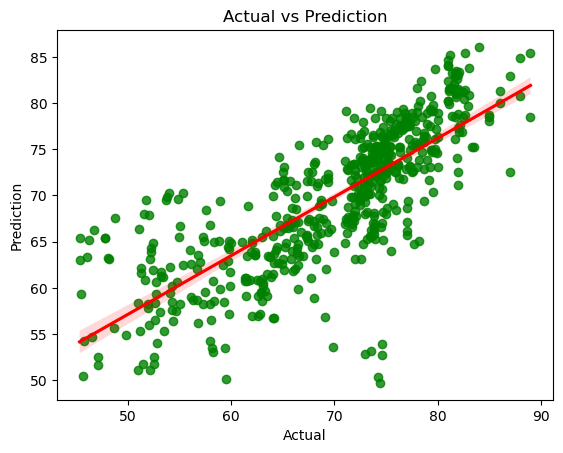

In [59]:
# Output 
plt.title("Actual vs Prediction")
sns.regplot(data=OUTPUT,x='Actual',y='Prediction',color='green',line_kws={'color':'red'})
plt.show()